# 9th Homework
## Theofanis Nitsos - p3352325

## Exercise 82

$P_y(\omega_1) = 1/3$ and $ P_y(\omega_2) = 2/3$  
$P_N(\omega_1) = 1/2$ and $ P_N(\omega_2) = 2/3$  
$I_y = 0.918$  
$I_N = 1 $  
  
Thus $\Delta I  = 0.02$

In [37]:
import numpy as np

I = - (0.4 * np.log2(0.4) + 0.6*np.log2(0.6)) # Root entropy

I_y = - (1/3*np.log2(1/3) + 2/3*np.log2(2/3)) 

I_n = - (1/2*np.log2(1/2) + 1/2*np.log2(1/2))

DI = I - 3/5 * I_y - 2/5 * I_n # Entropy reduction

print(DI)

0.01997309402197489


## Exercise 83

The problem below can be solved using decision trees

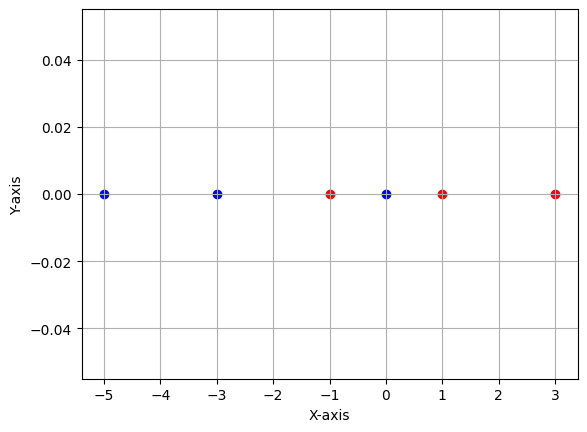

In [15]:
import matplotlib.pyplot as plt

# Given points
points = [(-5,0), (-3,0), (0,0), (-1,0), (1,0), (3,0)]

# Separate points into two groups for color coding
blue_points = points[:3]
red_points = points[3:]

# Extract x and y coordinates for plotting
x_blue, y_blue = zip(*blue_points)
x_red, y_red = zip(*red_points)

# Plot the points
plt.scatter(x_blue, y_blue, color='blue', label='Blue Points')
plt.scatter(x_red, y_red, color='red', label='Red Points')

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.grid()
plt.show()



## Exercise 84

$\frac{\partial L(\theta, \theta_0, \lambda)}{\partial \theta} = \frac{\partial \left (\frac{1}{2} \theta^T \theta - \sum_{i=1}^{N} \lambda_i[y_i(\theta^T x_i + \theta_0)-1] \right)}{\partial \theta} = \theta - \sum_{i=1}^{N} \lambda_i y_i x_i = 0 \Rightarrow$  
$ \Rightarrow \theta = \sum_{i=1}^{N} \lambda_i y_i x_i$  (1)  

$ \frac{\partial L(\theta, \theta_0, \lambda)}{\partial \theta_0} = \frac{\partial \left (\frac{1}{2} \theta^T \theta - \sum_{i=1}^{N} \lambda_i[y_i(\theta^T x_i + \theta_0)-1] \right)}{\partial \theta_0} = - \sum_{i=1}^{N} \lambda_i y_i = 0 \Rightarrow$  
$ \Rightarrow \sum_{i=1}^{N} \lambda_i y_i = 0$  (2)  

Using (1), (2) and the Lagrangian 

$ L(\theta, \theta_0, \lambda) = \frac{1}{2} \theta^T \theta - \sum_{i=1}^{N} \lambda_i[y_i(\theta^T x_i + \theta_0)-1] = \frac{1}{2} \sum_{i=1}^{N} (\lambda_i y_i x_i^T) \; \sum_{j=1}^{N} (\lambda_j y_j x_j) - \sum_{i=1}^{N} (\lambda_i y_i \theta^T x_i) - \theta_0 \, \sum_{i=1}^{N} (\lambda_i y_i) + \sum_{i=1}^{N} \lambda_i =$  
$= \sum_{i=1}^{N} \lambda_i -  \frac{1}{2} \sum_{i,j} \lambda_i \lambda_j y_i y_j x_i^T x_i  $  

Thus $min_{\theta,\lambda}L(\theta, \lambda)  \Leftrightarrow max_{\lambda \geq 0} L(\theta, \lambda)$

## Exercise 85

Looking at the plot below, it is expected that x=0 would be the line separating the 2 classes.

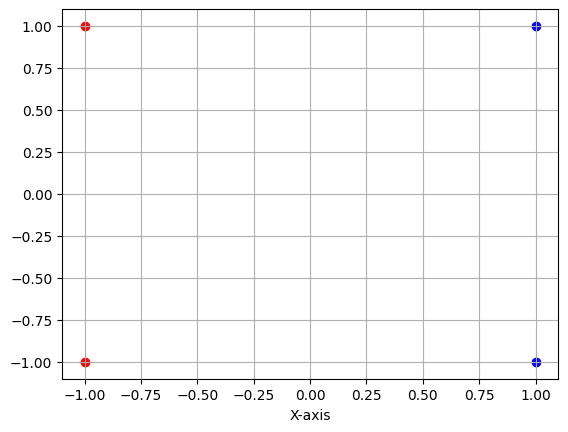

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Given points
x1 = np.array([-1, 1])
x2 = np.array([-1, -1])
x3 = np.array([1, -1])
x4 = np.array([1, 1])

# Plot the points
plt.scatter(x1[0], x1[1], color='red', label='x1')
plt.scatter(x2[0], x2[1], color='red', label='x2')
plt.scatter(x3[0], x3[1], color='blue', label='x3')
plt.scatter(x4[0], x4[1], color='blue', label='x4')

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel
plt.grid()

$J (\lambda) = \sum_{i=1}^{N} \lambda_i - \frac{1}{2} \lambda_i \lambda_j y_j y_i x_i^T x_j$, thus   

$ =$ a lot of calculations later $= \lambda_1 + \lambda_2 + \lambda_3 + \lambda_4 -  \lambda_1^2 - \lambda_2^2 - \lambda_3^2 - \lambda_4^2 - 2 \lambda_1 \lambda_3 - 2 \lambda_2 \lambda_4$  

$ \frac{\partial J (\lambda)}{\partial \lambda_1} = 1 -2 \lambda_1 - 2 \lambda_3 = 0 \Rightarrow \lambda_1 + \lambda_3 = \frac{1}{2}$  
$ \frac{\partial J (\lambda)}{\partial \lambda_2} = \lambda_2 + \lambda_4 = \frac{1}{2}$  

Further it stands that $ \sum_{i=1}^{N} \lambda_i y_i = 0 \Rightarrow \lambda_1 + \lambda_2 = \lambda_3 + \lambda_4$  
and using $ \theta = \sum_{i=1}^{N} \lambda_i y_i x_i$   
and using the 4th Karush-Kuhn-Tucker condition   $\lambda_1[y_1(\theta^T x_i + \theta_0)-1] = 0 \Rightarrow \theta_0=0$  
  
Thus $g(x) = \theta^T x + \theta_0 = 0 \Rightarrow x_1=0$

## Exercise 86

In [28]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, fbeta_score, make_scorer, roc_auc_score


Dataset_a = sio.loadmat('HW9a.mat')

train_x_a = Dataset_a['train_X']
train_y_a = Dataset_a['train_y']
test_x_a = Dataset_a['test_X']
test_y_a = Dataset_a['test_y']



from sklearn import svm


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

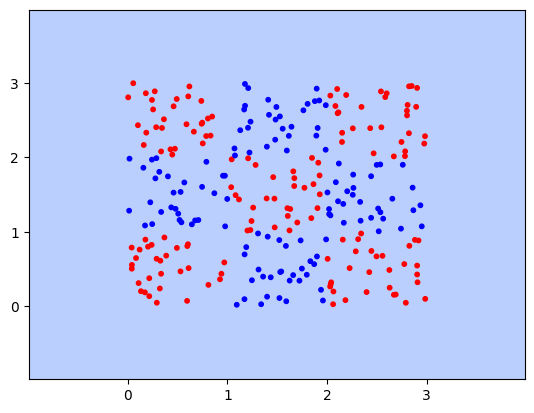

Accuracy: 50.00%


In [29]:
## Linear Kernel
#select kernel function:{'rbf','poly'}
clf = svm.SVC(kernel='linear',C=10,gamma=1,degree=2)
clf.fit(train_x_a, train_y_a.reshape(270))

X00, X11 = test_x_a[:,0], test_x_a[:,1]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in test_y_a.reshape(270)]
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, s=10, edgecolors='face')
plt.show()

print(f"Accuracy: {roc_auc_score(test_y_a, clf.predict(test_x_a).flatten())*100:.2f}%")

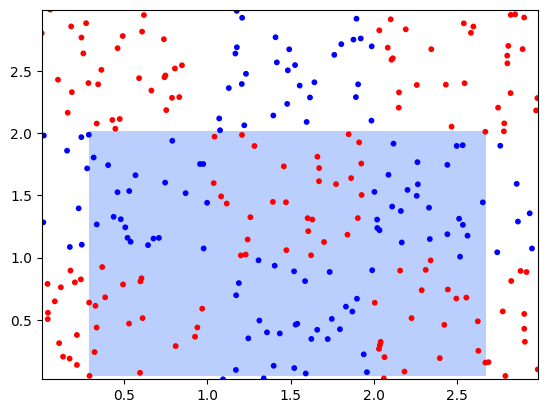

Accuracy: 50.00%


In [30]:
# Polynomial Kernel
# Select kernel function: {'rbf', 'poly'}
clf_poly = svm.SVC(kernel='poly', C=10, degree=2, gamma=1)
clf_poly.fit(train_x_a, train_y_a.reshape(270))

X00, X11 = test_x_a[:, 0], test_x_a[:, 1]
xx, yy = np.meshgrid(X00, X11)

fig, ax = plt.subplots(1, 1)
color = ['red' if l == 1 else 'blue' for l in test_y_a.reshape(270)]
plot_contours(ax, clf_poly, xx, yy, cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11, c=color, s=10, edgecolors='face')
plt.show()

accuracy = roc_auc_score(test_y_a, clf_poly.predict(test_x_a).flatten()) * 100
print(f"Accuracy: {accuracy:.2f}%")

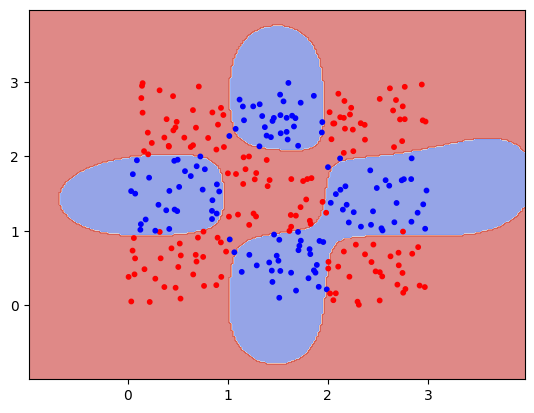

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [31]:
#select kernel function:{'rbf','poly'}
clf = svm.SVC(kernel='rbf',C=10,gamma=1,degree=2)
clf.fit(train_x_a, train_y_a.reshape(270))

X00, X11 = train_x_a[:,0], train_x_a[:,1]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in train_y_a.reshape(270)]
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color,  s=10, edgecolors='face')
plt.show()

clf.predict(test_x_a)

Trying out different parameters

In [32]:
# Linear Kernel with Grid Search
C_values = [0.1, 1, 10]
degree_values = [2, 3, 4]
gamma_values = [0.1, 1, 10]

best_accuracy = 0
best_params = {}

for C in C_values:
    for degree in degree_values:
        for gamma in gamma_values:
            clf_poly = svm.SVC(kernel='linear', C=C, degree=degree, gamma=gamma)
            clf_poly.fit(train_x_a, train_y_a.reshape(270))

            accuracy = roc_auc_score(test_y_a, clf_poly.predict(test_x_a).flatten())
            
            print(f"Parameters: C={C}, Degree={degree}, Gamma={gamma}, Accuracy: {accuracy:.2%}")

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'C': C, 'degree': degree, 'gamma': gamma}

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.2%}")

Parameters: C=0.1, Degree=2, Gamma=0.1, Accuracy: 50.00%
Parameters: C=0.1, Degree=2, Gamma=1, Accuracy: 50.00%
Parameters: C=0.1, Degree=2, Gamma=10, Accuracy: 50.00%
Parameters: C=0.1, Degree=3, Gamma=0.1, Accuracy: 50.00%
Parameters: C=0.1, Degree=3, Gamma=1, Accuracy: 50.00%
Parameters: C=0.1, Degree=3, Gamma=10, Accuracy: 50.00%
Parameters: C=0.1, Degree=4, Gamma=0.1, Accuracy: 50.00%
Parameters: C=0.1, Degree=4, Gamma=1, Accuracy: 50.00%
Parameters: C=0.1, Degree=4, Gamma=10, Accuracy: 50.00%
Parameters: C=1, Degree=2, Gamma=0.1, Accuracy: 50.00%
Parameters: C=1, Degree=2, Gamma=1, Accuracy: 50.00%
Parameters: C=1, Degree=2, Gamma=10, Accuracy: 50.00%
Parameters: C=1, Degree=3, Gamma=0.1, Accuracy: 50.00%
Parameters: C=1, Degree=3, Gamma=1, Accuracy: 50.00%
Parameters: C=1, Degree=3, Gamma=10, Accuracy: 50.00%
Parameters: C=1, Degree=4, Gamma=0.1, Accuracy: 50.00%
Parameters: C=1, Degree=4, Gamma=1, Accuracy: 50.00%
Parameters: C=1, Degree=4, Gamma=10, Accuracy: 50.00%
Parameters

In [33]:
# Polynomial Kernel with Grid Search
C_values = [0.1, 1, 10]
degree_values = [2, 3, 4]
gamma_values = [0.1, 1, 10]

best_accuracy = 0
best_params = {}

for C in C_values:
    for degree in degree_values:
        for gamma in gamma_values:
            clf_poly = svm.SVC(kernel='poly', C=C, degree=degree, gamma=gamma)
            clf_poly.fit(train_x_a, train_y_a.reshape(270))

            accuracy = roc_auc_score(test_y_a, clf_poly.predict(test_x_a).flatten())
            
            print(f"Parameters: C={C}, Degree={degree}, Gamma={gamma}, Accuracy: {accuracy:.2%}")

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'C': C, 'degree': degree, 'gamma': gamma}

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.2%}")

Parameters: C=0.1, Degree=2, Gamma=0.1, Accuracy: 50.00%
Parameters: C=0.1, Degree=2, Gamma=1, Accuracy: 50.00%
Parameters: C=0.1, Degree=2, Gamma=10, Accuracy: 50.00%
Parameters: C=0.1, Degree=3, Gamma=0.1, Accuracy: 50.00%
Parameters: C=0.1, Degree=3, Gamma=1, Accuracy: 50.00%
Parameters: C=0.1, Degree=3, Gamma=10, Accuracy: 50.00%
Parameters: C=0.1, Degree=4, Gamma=0.1, Accuracy: 50.00%
Parameters: C=0.1, Degree=4, Gamma=1, Accuracy: 67.58%
Parameters: C=0.1, Degree=4, Gamma=10, Accuracy: 66.33%
Parameters: C=1, Degree=2, Gamma=0.1, Accuracy: 50.00%
Parameters: C=1, Degree=2, Gamma=1, Accuracy: 50.00%
Parameters: C=1, Degree=2, Gamma=10, Accuracy: 50.00%
Parameters: C=1, Degree=3, Gamma=0.1, Accuracy: 50.00%
Parameters: C=1, Degree=3, Gamma=1, Accuracy: 50.00%
Parameters: C=1, Degree=3, Gamma=10, Accuracy: 50.00%
Parameters: C=1, Degree=4, Gamma=0.1, Accuracy: 50.00%
Parameters: C=1, Degree=4, Gamma=1, Accuracy: 68.00%
Parameters: C=1, Degree=4, Gamma=10, Accuracy: 70.25%
Parameters

In [36]:
# RBF Kernel Grid Search

# Best parameters and accuracy for RBF Kernel
best_accuracy_rbf = 0
best_params_rbf = {}

for C in C_values:
    for gamma in gamma_values:
        clf_rbf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        clf_rbf.fit(train_x_a, train_y_a.reshape(270))

        accuracy = roc_auc_score(test_y_a, clf_rbf.predict(test_x_a).flatten())
        
        print(f"RBF Kernel - Parameters: C={C}, Gamma={gamma}, Accuracy: {accuracy:.2%}")

        if accuracy > best_accuracy_rbf:
            best_accuracy_rbf = accuracy
            best_params_rbf = {'C': C, 'gamma': gamma}

print(f"Best Parameters for RBF Kernel: {best_params_rbf}")
print(f"Best Accuracy for RBF Kernel: {best_accuracy_rbf:.2%}")

RBF Kernel - Parameters: C=0.1, Gamma=0.1, Accuracy: 50.00%
RBF Kernel - Parameters: C=0.1, Gamma=1, Accuracy: 55.83%
RBF Kernel - Parameters: C=0.1, Gamma=10, Accuracy: 72.50%
RBF Kernel - Parameters: C=1, Gamma=0.1, Accuracy: 50.00%
RBF Kernel - Parameters: C=1, Gamma=1, Accuracy: 89.50%
RBF Kernel - Parameters: C=1, Gamma=10, Accuracy: 92.42%
RBF Kernel - Parameters: C=10, Gamma=0.1, Accuracy: 67.92%
RBF Kernel - Parameters: C=10, Gamma=1, Accuracy: 94.17%
RBF Kernel - Parameters: C=10, Gamma=10, Accuracy: 89.92%
Best Parameters for RBF Kernel: {'C': 10, 'gamma': 1}
Best Accuracy for RBF Kernel: 94.17%


We observe that the best accuracy is achieved with the RBF kernel followed by the polynomial and lastly the linear which is to be expected. Also the linear kernel does not seem to improve with different parameters in contrast to the polynomial and the rbf.